# Анализ рынка компьютерных игр

## Общая информация о наборе данных

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats as st
pd.options.display.max_columns = None

In [2]:
df = pd.read_csv('...')

In [3]:
# Посмотрим, как выглядит наш датасет
df.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [5]:
df.isna().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

<div style="border:solid orange 3px; padding: 20px">
    Таблица содержит 16715 записей, при этом в столбцах 'Name', 'Year_of_Release', 'Genre', 'Critic_Score', 'User_Score', 'Rating' есть пропуски. Кроме того, отдельные показатели имеют некорректный тип данных (целочисленный показатель года выпуска 'Year_of_Release' имеет тип float; 'User_Score', содержащий численные значения оценок пользователей имеет тип object)

## Подготовка данных

### Приведение названия столбцов к нижнему регистру

In [6]:
df.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')

In [7]:
# Названия столбцов набраны в разном регистре. Для удобства дальнейшей работы приведем все названия
# к нижнему регистру и проверим результат прообразований.
df.columns = df.columns.str.lower()
df.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

<div style="border:solid orange 3px; padding: 20px">
    Таким образом, привели названия всех столбцов к нижнему регистру.

### Преобразование типов данных

Преобразуем тип данных для столбца **`'year_of_release'`** из float в integer, т.к. годы - это целые числа и нули после запятой будут только мешать при дальнейшем анализе данных

In [8]:
df['year_of_release'] = df['year_of_release'].astype('Int64')

Столбец **`'user_score'`** имеет тип object, хотя визуально содержит числа типа float, с которыми в дальнейшем нам необходимо будет проводить различные арифметические расчеты. Если сразу преобразовать столбец в тип float, то появляется ошибка "ValueError: could not convert string to float: 'tbd'". Необходимо определиться, что означает эта аббревиатура, чтобы понять, как можно ее заменить

In [9]:
df['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

В результате поиска информации определено, что TBD - аббревиатура от английского To Be Determined (будет определено) или To Be Decided (будет решено). Используется, если какая-то информация еще не определена или решение по вопросу не принято. Т.е. можно заменить данные значения на NaN.

In [10]:
pd.options.display.max_columns = None

In [11]:
df['user_score'] = df['user_score'].replace('tbd', np.NaN)
df['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', '8.8', '6.9', '9.4', '6.8', '6.1',
       '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6', '3.7',
       '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9', '3.1',
       '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3', '2.7',
       '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0', '1.6',
       '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2', '2.3',
       '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'], dtype=object)

In [12]:
df['user_score'] = df['user_score'].astype(float)

In [13]:
# Проверим результат преобразования
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  Int64  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: Int64(1), float64(6), object(4)
memory usage: 1.4+ MB


<div style="border:solid orange 3px; padding: 20px">
    Таким образом, привели все необходимые столбцы к правильному типу данных.

### Обработка пропусков

In [14]:
# Проверим наличие дубликатов после приведения всех записей к строчному формату
for column in df[['name','platform','genre','rating']]:
    df[column] = df[column].str.lower()

In [15]:
df.duplicated().sum()

0

Явные дубликаты отсутствуют. Проверим также на наличие неявных дубликатов, где это возможно

In [16]:
df['genre'].unique()

array(['sports', 'platform', 'racing', 'role-playing', 'puzzle', 'misc',
       'shooter', 'simulation', 'action', 'fighting', 'adventure',
       'strategy', nan], dtype=object)

In [17]:
df['platform'].unique()

array(['wii', 'nes', 'gb', 'ds', 'x360', 'ps3', 'ps2', 'snes', 'gba',
       'ps4', '3ds', 'n64', 'ps', 'xb', 'pc', '2600', 'psp', 'xone',
       'wiiu', 'gc', 'gen', 'dc', 'psv', 'sat', 'scd', 'ws', 'ng', 'tg16',
       '3do', 'gg', 'pcfx'], dtype=object)

In [18]:
df['rating'].unique()

array(['e', nan, 'm', 't', 'e10+', 'k-a', 'ao', 'ec', 'rp'], dtype=object)

В результате изучения расшифровок рейтинга были выявлены неявные дубликаты: рейтинг 'e' первоначально обозначался 'k-a'.
- 'e' («Everyone») — «Для всех» Первоначально "K-A" ("Kids to Adults") 
- 'm' («Mature») — «Для взрослых»
- 't' («Teen») — «Подросткам»
- 'e10+' («Everyone 10 and older») — «Для всех от 10 лет и старше»
- 'ao' («Adults Only 18+») — «Только для взрослых»
- 'ec' («Early childhood») — «Для детей младшего возраста»
- 'rp' («Rating Pending») — «Рейтинг ожидается»


In [19]:
# Заменим значения "к-а" на "е"
df['rating'] = df['rating'].replace('k-a', 'e')

In [20]:
len(df['name'].unique())

11560

Столбец с названиями игр содержит слишком много уникальных значений, что не позволяет нам отследить неявные дубликаты без больших физических затрат. В дальнейшем нам не потребуется анализ отдельных игр, поэтому пропустим этот шаг. Перейдем непосредственно к обработке пропусков

In [21]:
df.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         9125
rating             6766
dtype: int64

Первый столбец с пропусками - **`'name'`**

In [22]:
# Проверим, в каких строках отсутствует название игры
df[df['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,gen,1993,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,gen,1993,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [23]:
# Убедимся, что это не единственные строки с платформой gen
df.query('platform == "gen"')['platform'].value_counts()

gen    29
Name: platform, dtype: int64

Оба пропуска в столбце 'name' находятся в тех же строках, что и оба пропуска в столбце 'genre'. Без этих параметров невозможно идентифицировать игру, к тому же эти пропуски составляют всего 0,01% от выборки и не имеют значений в столбцах с оценками и рейтингом, поэтому эти строки можно удалить.

In [24]:
df.dropna(subset = ['name'],inplace = True)

In [25]:
df.isna().sum()

name                  0
platform              0
year_of_release     269
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8576
user_score         9123
rating             6764
dtype: int64

Далее рассмотрим пропуски в столбце **`'year_of_release'`**. Поначалу было предположение, что игры выходят на разных платформах в один год, но в ходе изучения датасета были обнаружены игры, которые выпускались в абсолютно разные годы на разных платформах. Например, "Need for speed: most wanted" выходила в 2005, 2012 и 2013 годах. Т.к. нам в дальнейшем будет необходимо анализировать данные в разрезе лет для определения актуального периода с целью последующего прогнозирования, то искусственное восстановление данных о годах может исказить результаты расчетов. Кроме того, пропуски составляют всего 1,6% от объема выборки, поэтому удалим эти строки.

In [26]:
df[df['name'] == 'need for speed: most wanted']['year_of_release'].unique()

<IntegerArray>
[2005, 2012, 2013]
Length: 3, dtype: Int64

In [27]:
df.dropna(subset = ['year_of_release'],inplace = True)

In [28]:
df.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         8981
rating             6676
dtype: int64

Далее рассмотрим столбец **`'rating'`**

In [29]:
df[df['rating'].isna()].head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,super mario bros.,nes,1985,platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,pokemon red/pokemon blue,gb,1996,role-playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,tetris,gb,1989,puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,duck hunt,nes,1984,shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,nintendogs,ds,2005,simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN


In [30]:
df['rating'].value_counts()

e       3924
t       2905
m       1536
e10+    1393
ec         8
rp         1
ao         1
Name: rating, dtype: int64

Пропуски в столбце "rating" составляют почти половину датасета и не могут быть просто удалены, т.к. в других столбцах есть заполненные значения, необходимые нам для дальнейшего анализа. Но и как-то корректно восстановить пропущенные значения мы не можем, поэтому заменим пропущенные значения на обозначение "unknown". Также заменим на "unknown" единственное значение рейтинга rp которое тоже по сути обозначает неизвестный рейтинг.

In [31]:
df['rating'] = df['rating'].fillna('unknown')
df['rating'] = df['rating'].replace('rp', 'unknown')

In [32]:
df['rating'].value_counts()

unknown    6677
e          3924
t          2905
m          1536
e10+       1393
ec            8
ao            1
Name: rating, dtype: int64

Пропуски в столбцах **`'critic_score'`** и **`'user_score'`** заполнить не представляется возможным. Одна и та же игра может иметь сильно различающиеся оценки на разных платформах и заполнение пропусков синтетическими данными может привести к искажению результатов анализа. Так, например, пользовательская оценка FIFA 14 на PS4 - 6,3 из 10, а на PSV - 1,8.

In [33]:
df[df['name'] == 'fifa 14']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
126,fifa 14,ps3,2013,sports,0.78,4.24,0.07,1.37,86.0,4.3,e
271,fifa 14,x360,2013,sports,0.92,2.89,0.01,0.40,84.0,4.2,e
469,fifa 14,ps4,2013,sports,0.61,1.85,0.11,0.44,87.0,6.3,e
1753,fifa 14,xone,2013,sports,0.41,0.66,0.00,0.09,88.0,5.8,e
4699,fifa 14,psv,2013,sports,0.08,0.23,0.01,0.09,NaN,1.8,e
4809,fifa 14,pc,2013,sports,0.01,0.36,0.00,0.03,87.0,4.6,e
4985,fifa 14,wii,2013,sports,0.00,0.36,0.00,0.02,NaN,4.3,e
6871,fifa 14,3ds,2013,sports,0.00,0.22,0.00,0.01,NaN,NaN,unknown
7875,fifa 14,psp,2013,sports,0.00,0.15,0.00,0.04,NaN,3.4,e


Проверим предположение, что оценки критиков отсутстсвуют либо для игр на непопулярных платформах, либо для игр, выпущенных давно

In [34]:
bb = (
    df[df['critic_score'].isna()]
    .pivot_table(index='platform', values='name', aggfunc='count')
    .sort_values(by='name')
)
aa = df.pivot_table(index='platform', values='name', aggfunc='count').sort_values(by='name')
aa['nan'] = bb['name']
aa.sort_values(by = 'name')

,name,nan
platform,,
gg,1,1
pcfx,1,1
tg16,2,2
3do,3,3
ws,6,6
scd,6,6
ng,12,12
gen,27,27
dc,52,38


In [35]:
cc = (
    df[df['critic_score'].isna()]
    .pivot_table(index='year_of_release', values='name', aggfunc='count')
    .sort_values(by='name')
)
dd = df.pivot_table(index='year_of_release', values='name', aggfunc='count').sort_values(by='name')
dd['nan'] = cc['name']
dd.sort_values(by = 'name')

,name,nan
year_of_release,,
1980,9,9
1984,14,14
1985,14,13
1988,15,14
1990,16,16
1987,16,16
1989,17,17
1983,17,17
1986,21,21


До 2000 года практически у всех игр отсутствовал рейтинг, что возможно связано с отсутствием специализированных организаций по оценке рейтинга в то время. Также рейтинг отсутствует практически у всех игр на игровых платформах, выпустивших менее 100 игр.

In [36]:
display(df.isna().sum(), df.shape)

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         8981
rating                0
dtype: int64

(16444, 11)

<div style="border:solid orange 3px; padding: 20px">
    Таким образом, провели обработку пропусков в нашем датасете. Часть из них удалили, т.к. их было очень мало (name, genre, year_of_release), пропуски в столбце с рейтингом заменили на unknown, пропуски в оценках критиков и пользователей оставили без изменений, т.к. они составляют половину от нашей выборки, а заполнение их синтетическими данными нецелесообразно.

### Суммарные продажи во всех регионах

In [37]:
df['sum_sales'] = df[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis = 1)

In [38]:
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
0,wii sports,wii,2006,sports,41.36,28.96,3.77,8.45,76.0,8.0,e,82.54
1,super mario bros.,nes,1985,platform,29.08,3.58,6.81,0.77,NaN,NaN,unknown,40.24
2,mario kart wii,wii,2008,racing,15.68,12.76,3.79,3.29,82.0,8.3,e,35.52
3,wii sports resort,wii,2009,sports,15.61,10.93,3.28,2.95,80.0,8.0,e,32.77
4,pokemon red/pokemon blue,gb,1996,role-playing,11.27,8.89,10.22,1.00,NaN,NaN,unknown,31.38


<div style="border:solid orange 3px; padding: 20px">
    Построили новый столбец 'sum_sales', отображающий суммарные продажи игр во всех регионах

## Исследовательский анализ данных

### Анализ выпуска игр по годам

In [39]:
df_pivot = df.pivot_table(index='year_of_release', values='name', aggfunc='count')
df_pivot

,name
year_of_release,
1980,9
1981,46
1982,36
1983,17
1984,14
1985,14
1986,21
1987,16
1988,15


Для наглядности построим график

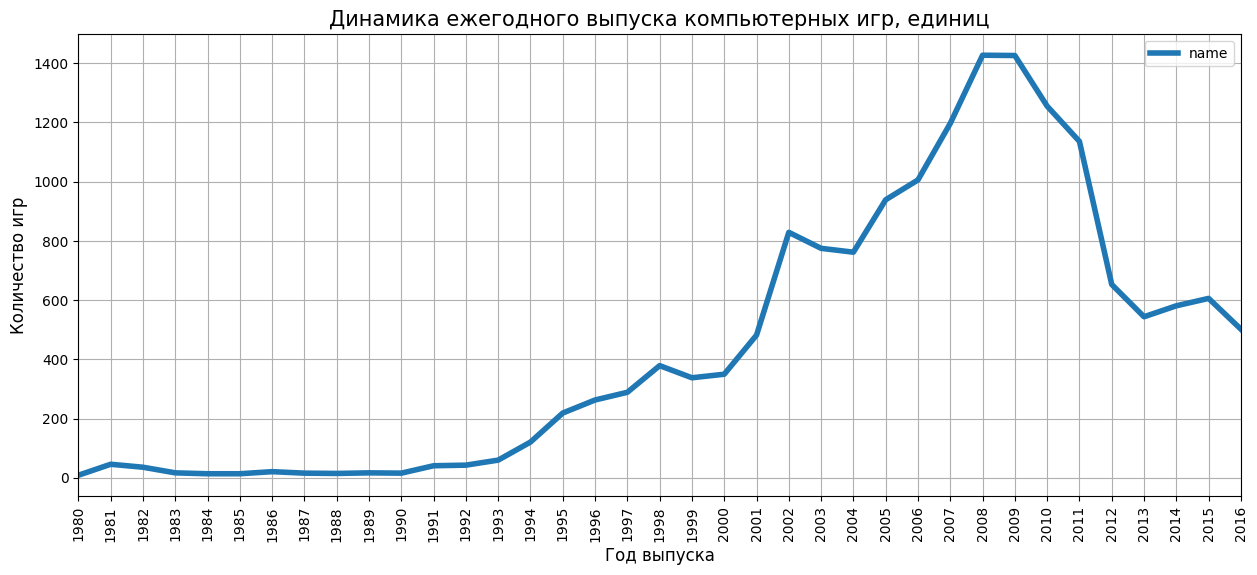

In [40]:
df_pivot.plot(xlim=(1980, 2016), grid=True, figsize=(15,6), linewidth=4.0)
plt.title("Динамика ежегодного выпуска компьютерных игр, единиц", fontsize = 15)
plt.xlabel("Год выпуска", fontsize = 12)
plt.ylabel("Количество игр", fontsize = 12)
plt.xticks(np.arange(1980, 2017, 1))
plt.xticks(rotation=90)
plt.show()

<div style="border:solid orange 3px; padding: 20px">
    До 1994 года выпускалось менее 100 игр в год, затем постепенно отмечался рост числа игр, за исключением отдельных годов, пик выпускаемых игр пришелся на 2006-2011 годы, когда выпускалось более 1000 игр, наибольшее количество игр за рассматриваемый период было выпущено в 2008 году - 1441 игра, после 2011 года отмечается резкий спад количества выпускаемых игр. На данном этапе сложно определить актуальный период, хоть до 1994 года и выпускалось мало игр, но там уже присутствовала платформа рс, которая продолжает сущестование до сих пор. Решение об актуальном периоде примем позднее, после дополнительного анализа.

### Анализ продаж видеоигр в разрезе платформ

In [41]:
df_platf = (
    df.pivot_table(index='platform', values='sum_sales', aggfunc='sum')
    .sort_values(by='sum_sales', ascending=False)
)
df_platf.head(10)

,sum_sales
platform,
ps2,1233.56
x360,961.24
ps3,931.34
wii,891.18
ds,802.78
ps,727.58
ps4,314.14
gba,312.88
psp,289.53


Топ-10 игровых платформ по продажам приведены в таблице выше. Лидер - ps2. Для наглядности посторим гистограмму.

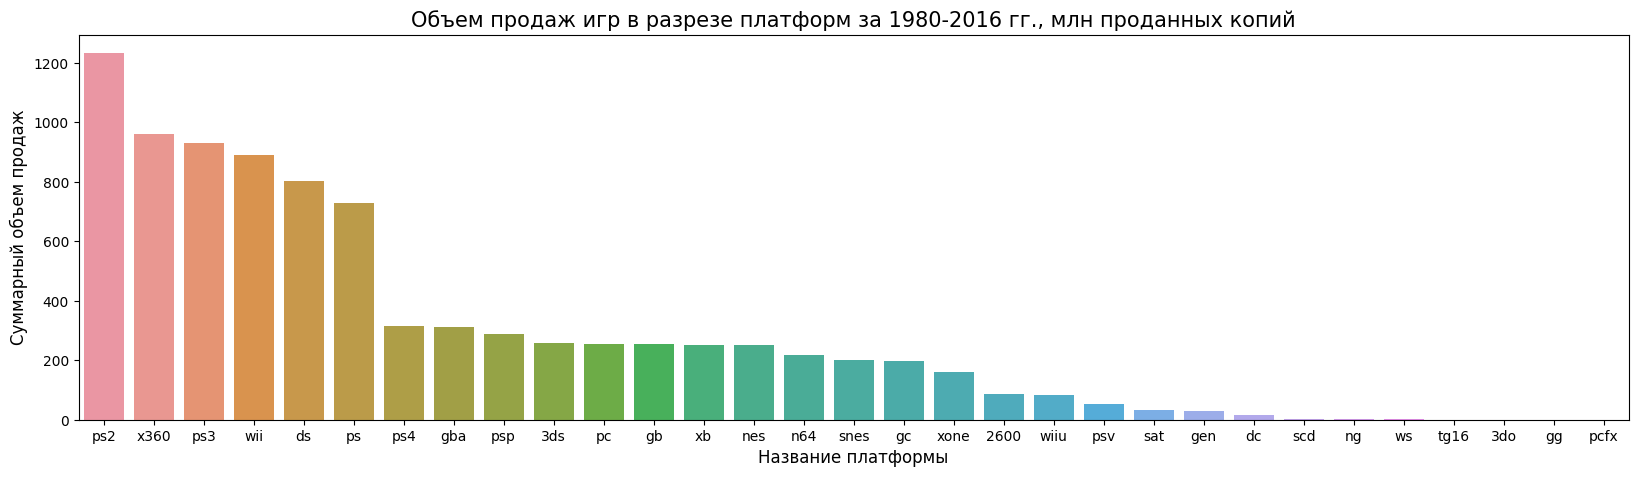

In [42]:
plt.figure(figsize=(20,5))
sns.barplot(x=df_platf.index,y=df_platf['sum_sales'])
plt.title("Объем продаж игр в разрезе платформ за 1980-2016 гг., млн проданных копий", fontsize = 15)
plt.xlabel("Название платформы", fontsize = 12)
plt.ylabel("Суммарный объем продаж", fontsize = 12);

На графике видно, что наиболее выделяются первые шесть платформ (ps2, x360, ps3, wii, ds, ps), их и возьмем для дальнейшего анализа

In [43]:
df_platf = df_platf.reset_index().rename_axis(None, axis=1)

In [44]:
def sum_sales_year_platform(name, data):
    data_platf = data[data['platform'] == name]
    total = (
        data_platf.pivot_table(index='year_of_release', values='sum_sales', aggfunc='sum')
        .sort_values('year_of_release', ascending=False)
    )
    return total

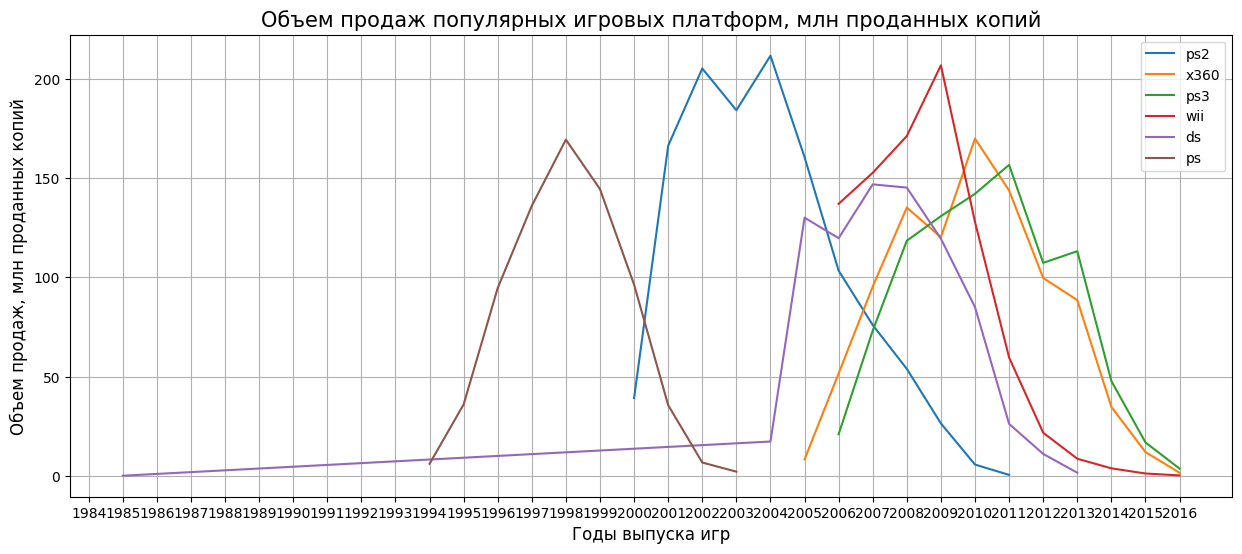

In [45]:
plt.figure(figsize=(15,6))
plt.grid()
plt.xticks(np.arange(1980, 2017, 1))
plt.title('Объем продаж популярных игровых платформ, млн проданных копий', fontsize = 15)
plt.xlabel('Годы выпуска игр', fontsize = 12)
plt.ylabel('Объем продаж, млн проданных копий', fontsize = 12)

for i in list(df_platf['platform'].head(6)):
    sns.lineplot(data=sum_sales_year_platform(i,df)['sum_sales'], label=i)
    plt.legend()

При построении графика обнаружили аномальное значение для платформы ds.

In [46]:
df.query('platform == "ds"').pivot_table(index='year_of_release', values='sum_sales', aggfunc='sum')

,sum_sales
year_of_release,
1985,0.02
2004,17.27
2005,130.14
2006,119.81
2007,146.94
2008,145.31
2009,119.54
2010,85.02
2011,26.18


In [47]:
df.query('platform == "ds" and year_of_release == 1985')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
15957,strongest tokyo university shogi ds,ds,1985,action,0.0,0.0,0.02,0.0,NaN,NaN,unknown,0.02


In [48]:
df.query('name == "strongest tokyo university shogi ds"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
15957,strongest tokyo university shogi ds,ds,1985,action,0.0,0.0,0.02,0.0,NaN,NaN,unknown,0.02


Платфома ds появилась только в 2004 году, поэтому значение за 1985 год является ошибочным. Удалим его и ещё раз построим график.

In [49]:
df = df[df['name'] != 'strongest tokyo university shogi ds']

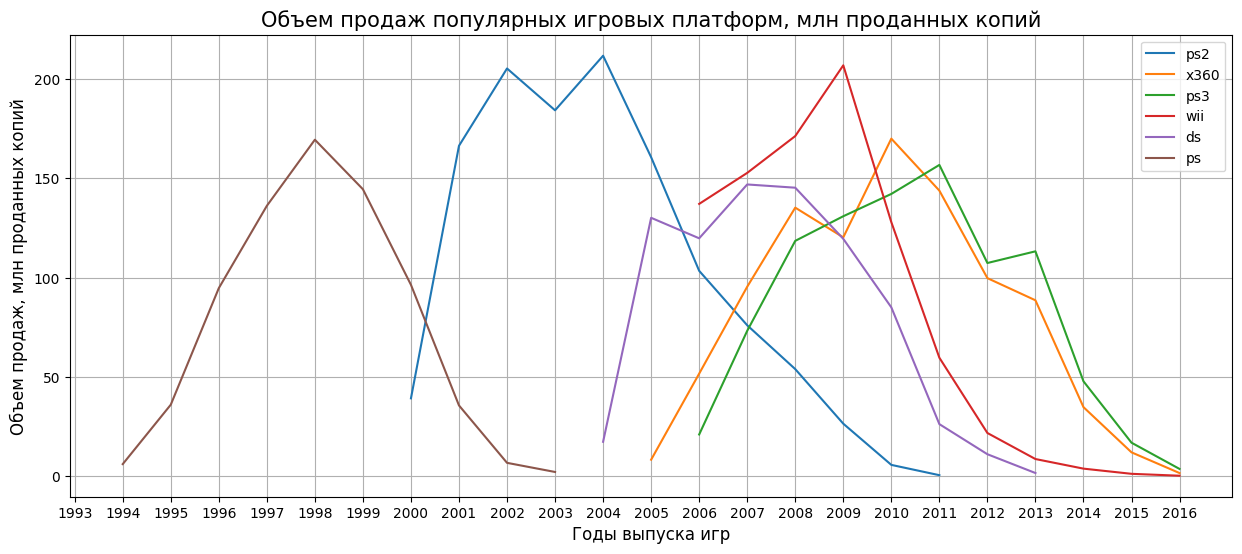

In [50]:
plt.figure(figsize=(15,6))
plt.grid()
plt.xticks(np.arange(1980, 2017, 1))
plt.title('Объем продаж популярных игровых платформ, млн проданных копий', fontsize = 15)
plt.xlabel('Годы выпуска игр', fontsize = 12)
plt.ylabel('Объем продаж, млн проданных копий', fontsize = 12)

for i in list(df_platf['platform'].head(6)):
    sns.lineplot(data=sum_sales_year_platform(i,df)['sum_sales'], label=i)
    plt.legend()

<div style="border:solid orange 3px; padding: 20px">
    Можно отметить схожую динамику по объемам продаж для всех рассмотренных игровых платформ. Все графики в той или иной мере схожи с параболой - до определенного момента отмечается рост объема продаж, после прохождения пика наблюдается постепенное снижение. Продажи некогда популярных ps и ps2 к концу рассмотренного периода уже находятся на нуле, т.к. на смену им пришло новое поколение ps3. Также на нуле продажи ds. В целом жизненный цикл одной игровой платформы составляет около 10 лет. От момента запуска одной игровой платформы до момента запуска другой игровой платформы проходит от 1 до 6 лет. В 90-е, когда конкуренция была не столь велика, от момента запуска ps до запуска ps2 прошло 6 лет, а уже следующая платформа появилась через 4 года (ds), а за ней уже через год вышла x360 и следом ещё через год - ps3. На примере ps также можно отметить, что следующее поколение платформы выходит примерно через 6 лет после предыдущего (в 1994 вышла ps, в 2000 - ps2, в 2006 - ps3).

### Определение актуального периода для построения прогноза на 2017 год

Т.к. средняя "продолжительность жизни" игровой платформы около 10 лет, посмотрим на данные за последние 10 лет, чтобы выявить, какие платформы появились в этот период, что поможет определиться нам с актуальным периодом для дальнейшего составления прогноза

In [51]:
(
    df.pivot_table(index='year_of_release', columns='platform', values='sum_sales', aggfunc='sum')
    .query('year_of_release > 2006')
)

platform,2600,3do,3ds,dc,ds,gb,gba,gc,gen,gg,n64,nes,ng,pc,pcfx,ps,ps2,ps3,ps4,psp,psv,sat,scd,snes,tg16,wii,wiiu,ws,x360,xb,xone
year_of_release,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2007,NaN,NaN,NaN,0.02,146.94,NaN,3.4,0.27,NaN,NaN,NaN,NaN,NaN,9.28,NaN,NaN,75.99,73.19,NaN,46.93,NaN,NaN,NaN,NaN,NaN,152.77,NaN,NaN,95.41,0.55,NaN
2008,NaN,NaN,NaN,0.04,145.31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.42,NaN,NaN,53.90,118.52,NaN,34.55,NaN,NaN,NaN,NaN,NaN,171.32,NaN,NaN,135.26,0.18,NaN
2009,NaN,NaN,NaN,NaN,119.54,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.91,NaN,NaN,26.40,130.93,NaN,37.78,NaN,NaN,NaN,NaN,NaN,206.97,NaN,NaN,120.29,NaN,NaN
2010,NaN,NaN,NaN,NaN,85.02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24.28,NaN,NaN,5.64,142.17,NaN,35.04,NaN,NaN,NaN,NaN,NaN,127.95,NaN,NaN,170.03,NaN,NaN
2011,NaN,NaN,63.20,NaN,26.18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.03,NaN,NaN,0.45,156.78,NaN,17.82,4.63,NaN,NaN,NaN,NaN,59.65,NaN,NaN,143.84,NaN,NaN
2012,NaN,NaN,51.36,NaN,11.01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.22,NaN,NaN,NaN,107.36,NaN,7.69,16.19,NaN,NaN,NaN,NaN,21.71,17.56,NaN,99.74,NaN,NaN
2013,NaN,NaN,56.57,NaN,1.54,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.38,NaN,NaN,NaN,113.25,25.99,3.14,10.59,NaN,NaN,NaN,NaN,8.59,21.65,NaN,88.58,NaN,18.96
2014,NaN,NaN,43.76,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.28,NaN,NaN,NaN,47.76,100.00,0.24,11.90,NaN,NaN,NaN,NaN,3.75,22.03,NaN,34.74,NaN,54.07
2015,NaN,NaN,27.78,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.52,NaN,NaN,NaN,16.82,118.90,0.12,6.25,NaN,NaN,NaN,NaN,1.14,16.35,NaN,11.96,NaN,60.14


В этом периоде появилсь платформы 3ds, ps4, psv, wiiu и xone, также продолжились продажи игр на pc, хоть и в меньшем объеме. Некогда популярные ds и ps2 прекратили выпуск игр, x360, ps3 и wii существенно сократили продажи по причине появления нового поколения этих платформ. Построим график с новыми платформами и опредедлимся с актуальным периодом.

In [52]:
df_platf_2 = df_platf.query('platform == ["3ds", "ps4", "psv", "wiiu", "xone", "pc"]')

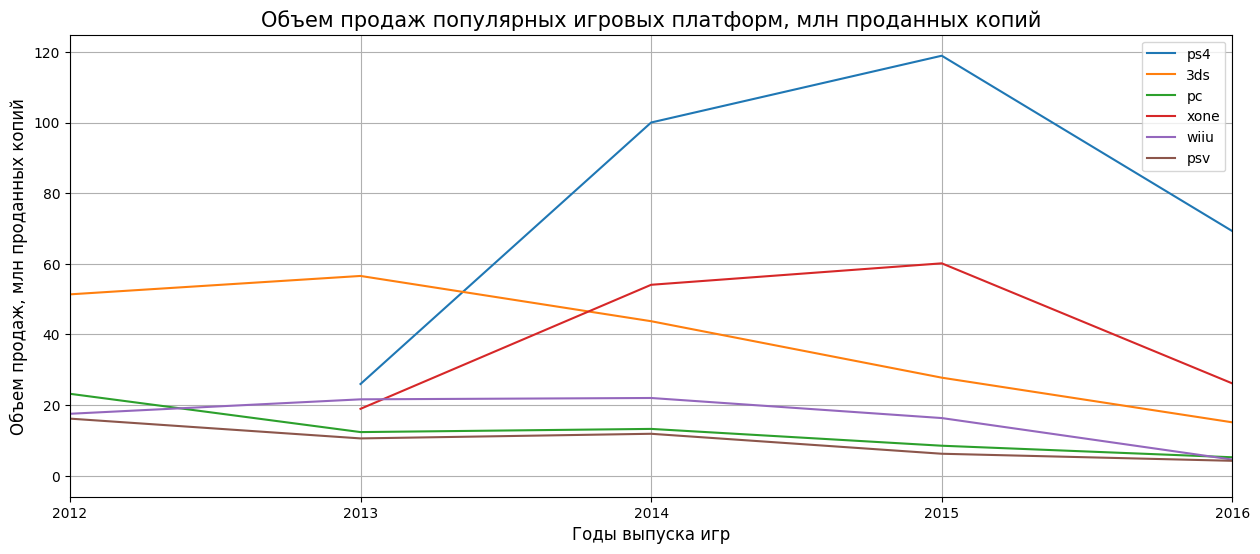

In [53]:
plt.figure(figsize=(15,6))
plt.grid()
plt.xticks(np.arange(2012, 2017, 1))
plt.xlim([2012, 2016])
plt.title('Объем продаж популярных игровых платформ, млн проданных копий', fontsize = 15)
plt.xlabel('Годы выпуска игр', fontsize = 12)
plt.ylabel('Объем продаж, млн проданных копий', fontsize = 12)

for i in list(df_platf_2['platform']):
    sns.lineplot(data=sum_sales_year_platform(i,df)['sum_sales'], label=i)
    plt.legend()

<div style="border:solid orange 3px; padding: 20px">
Актуальным периодом для анализа выбираем 2013-2016 гг., т.к в 2013 г. появились ps4 и xone, которые являлись лидерами рынка в 2014-2016 гг. и в большей степени определяли его динамику.

### Определение потенциально прибыльных платформ

In [54]:
# Отфильтруем датафрейм с учетом актуального периода
df_new = df[df['year_of_release'] > 2012]
df_new.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
16,grand theft auto v,ps3,2013,action,7.02,9.09,0.98,3.96,97.0,8.2,m,21.05
23,grand theft auto v,x360,2013,action,9.66,5.14,0.06,1.41,97.0,8.1,m,16.27
31,call of duty: black ops 3,ps4,2015,shooter,6.03,5.86,0.36,2.38,NaN,NaN,unknown,14.63
33,pokemon x/pokemon y,3ds,2013,role-playing,5.28,4.19,4.35,0.78,NaN,NaN,unknown,14.60
42,grand theft auto v,ps4,2014,action,3.96,6.31,0.38,1.97,97.0,8.3,m,12.62


In [55]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2233 entries, 16 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             2233 non-null   object 
 1   platform         2233 non-null   object 
 2   year_of_release  2233 non-null   Int64  
 3   genre            2233 non-null   object 
 4   na_sales         2233 non-null   float64
 5   eu_sales         2233 non-null   float64
 6   jp_sales         2233 non-null   float64
 7   other_sales      2233 non-null   float64
 8   critic_score     991 non-null    float64
 9   user_score       1192 non-null   float64
 10  rating           2233 non-null   object 
 11  sum_sales        2233 non-null   float64
dtypes: Int64(1), float64(7), object(4)
memory usage: 229.0+ KB


In [56]:
# Создаем сводную таблицу для определения суммарных продаж по платформам
df_platf_new = (
    df_new.pivot_table(index='platform', values='sum_sales', aggfunc='sum')
    .sort_values(by='sum_sales', ascending=False)
)
df_platf_new

,sum_sales
platform,
ps4,314.14
ps3,181.43
xone,159.32
3ds,143.25
x360,136.80
wiiu,64.63
pc,39.43
psv,32.99
wii,13.66


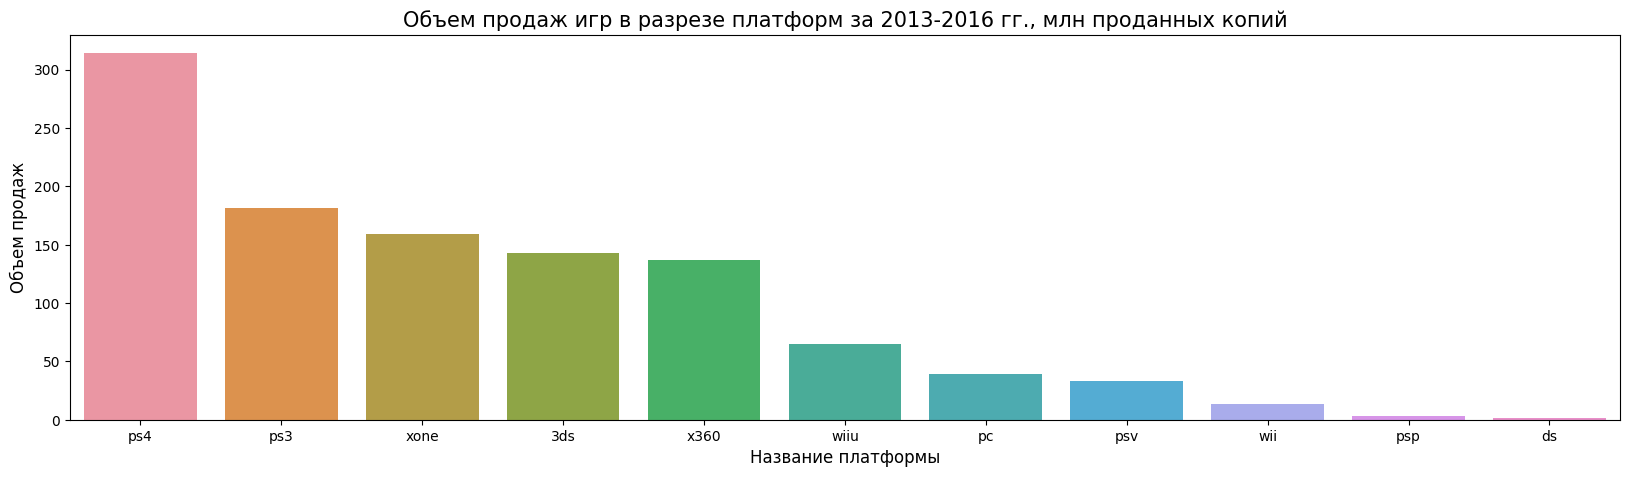

In [57]:
plt.figure(figsize=(20,5))
sns.barplot(x=df_platf_new.index,y=df_platf_new['sum_sales'])
plt.title("Объем продаж игр в разрезе платформ за 2013-2016 гг., млн проданных копий", fontsize = 15)
plt.xlabel("Название платформы", fontsize = 12)
plt.ylabel("Объем продаж", fontsize = 12);

In [58]:
df_new.pivot_table(index='year_of_release', columns='platform', values='sum_sales', aggfunc='sum')

platform,3ds,ds,pc,ps3,ps4,psp,psv,wii,wiiu,x360,xone
year_of_release,,,,,,,,,,,
2013,56.57,1.54,12.38,113.25,25.99,3.14,10.59,8.59,21.65,88.58,18.96
2014,43.76,NaN,13.28,47.76,100.00,0.24,11.90,3.75,22.03,34.74,54.07
2015,27.78,NaN,8.52,16.82,118.90,0.12,6.25,1.14,16.35,11.96,60.14
2016,15.14,NaN,5.25,3.60,69.25,NaN,4.25,0.18,4.60,1.52,26.15


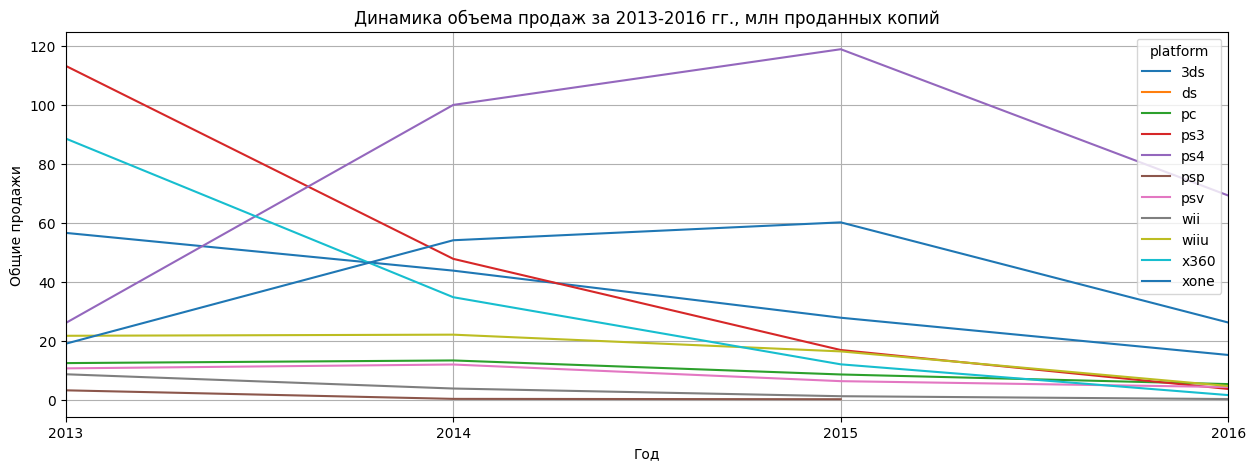

In [59]:
(
    df_new.pivot_table(index='year_of_release', columns='platform', values='sum_sales', aggfunc='sum')
    .plot(figsize=(15,5), grid=True, xticks=np.arange(2013, 2017, 1), xlabel='Год', ylabel='Общие продажи', 
          title='Динамика объема продаж за 2013-2016 гг., млн проданных копий', xlim=(2013,2016))
    
)
plt.show()

<div style="border:solid orange 3px; padding: 20px">
    Топ-5 платформ по продажам за 2013-2016 гг.: ps4, ps3, xone, 3ds, x360. При этом продажи ps3, 3ds и x360 идут на спад и сами платформы находятся в конечной стадии своего существования, в то время как ps4 и xone судя по динамике других платформ еще скорее всего не прошли свой пик продаж и на данный момент являются потенциально самыми прибыльными платформами.

### График «ящик с усами» по глобальным продажам игр в разбивке по платформам

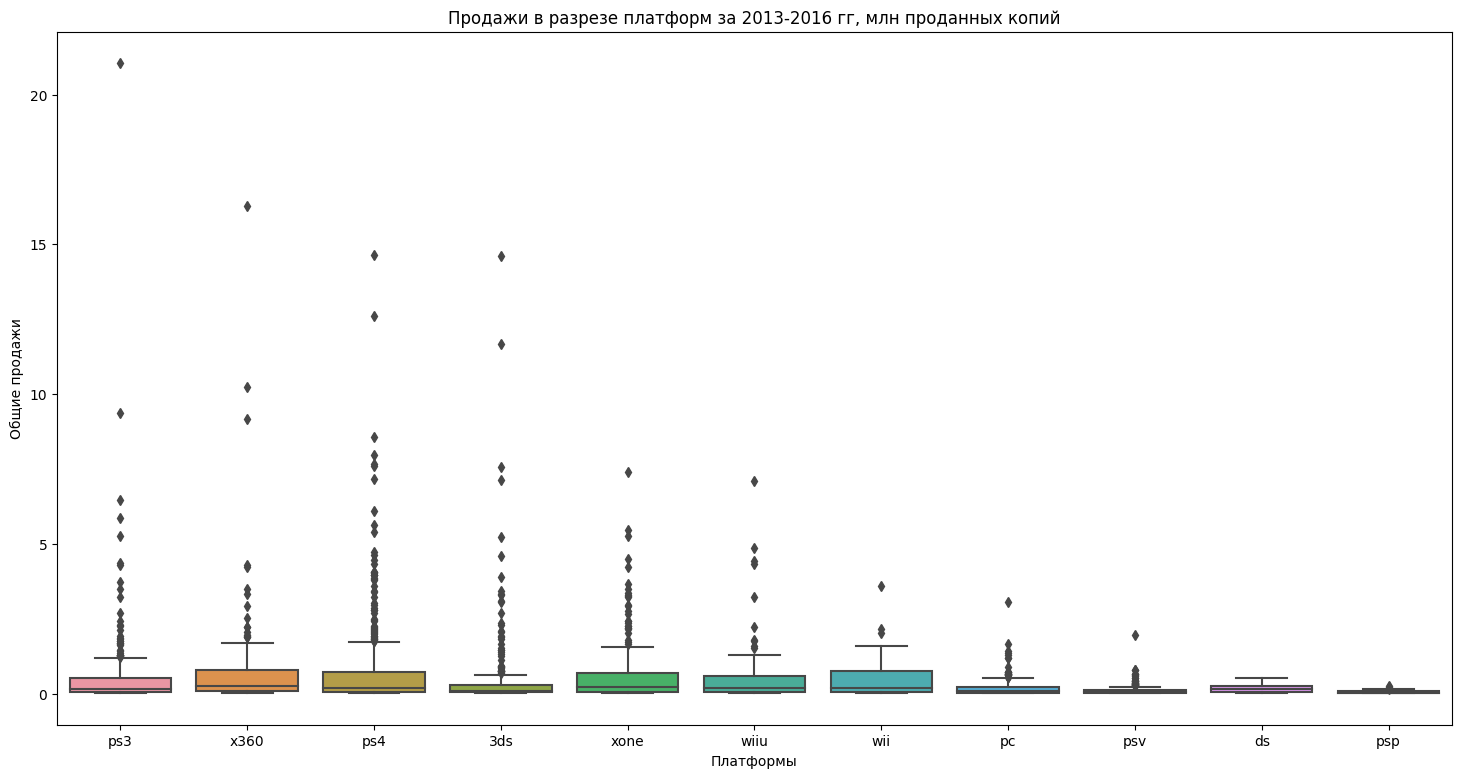

In [60]:
plt.figure(figsize=(18, 9))
(
    sns.boxplot(data = df_new, y = 'sum_sales', x='platform')
    .set(title = 'Продажи в разрезе платформ за 2013-2016 гг, млн проданных копий', 
         xlabel = 'Платформы', 
         ylabel = 'Общие продажи')
)
         
plt.show()
         

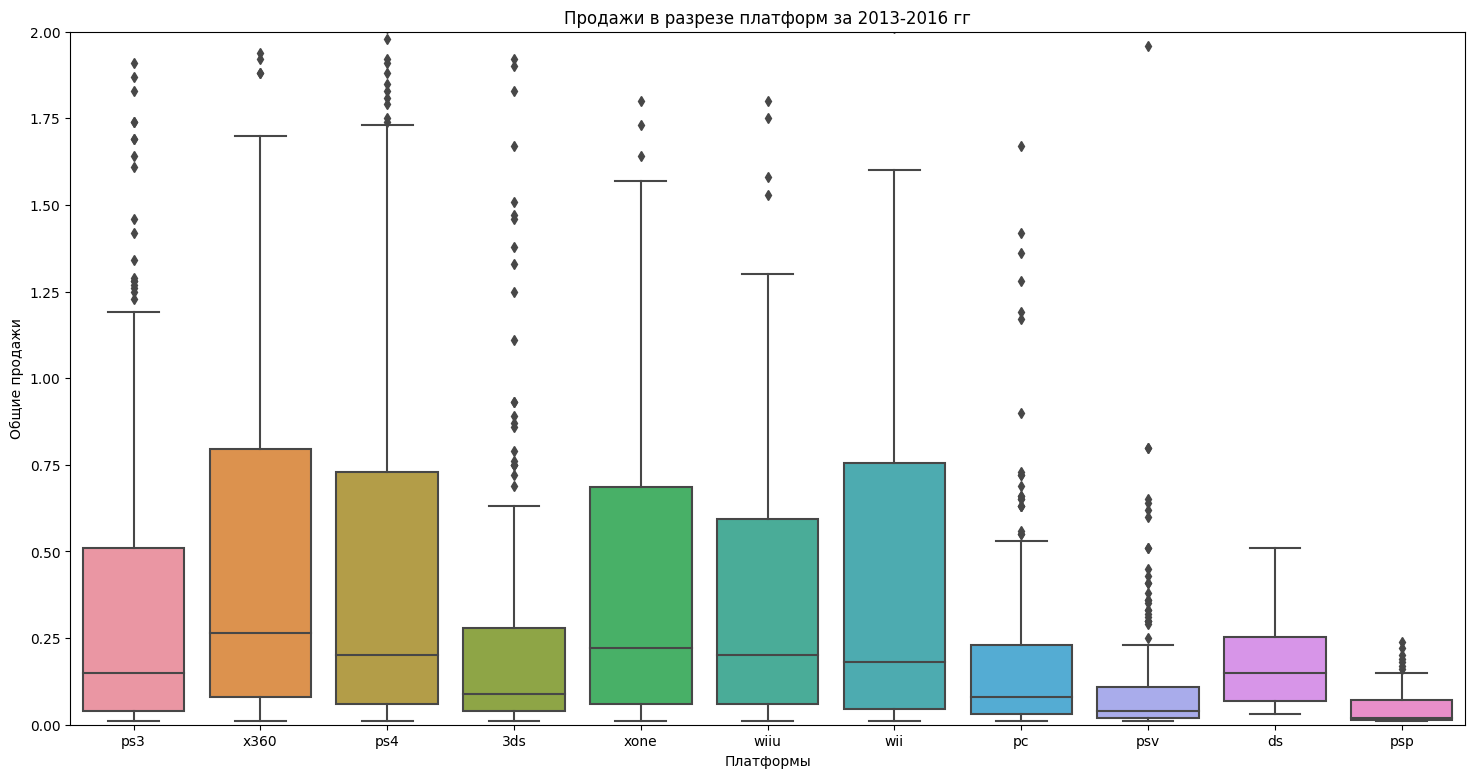

In [61]:
# Построим ещё один график с ограничением по оси у, чтобы рассмотреть основной массив данных
plt.figure(figsize=(18, 9))
(
    sns.boxplot(data = df_new, y = 'sum_sales', x='platform')
    .set(title = 'Продажи в разрезе платформ за 2013-2016 гг', 
         xlabel = 'Платформы', 
         ylabel = 'Общие продажи',
         ylim=(0, 2))
)
plt.show()

In [62]:
# Посмотрим на строки с выбросами
df_new.query('sum_sales > 10')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
16,grand theft auto v,ps3,2013,action,7.02,9.09,0.98,3.96,97.0,8.2,m,21.05
23,grand theft auto v,x360,2013,action,9.66,5.14,0.06,1.41,97.0,8.1,m,16.27
31,call of duty: black ops 3,ps4,2015,shooter,6.03,5.86,0.36,2.38,NaN,NaN,unknown,14.63
33,pokemon x/pokemon y,3ds,2013,role-playing,5.28,4.19,4.35,0.78,NaN,NaN,unknown,14.60
42,grand theft auto v,ps4,2014,action,3.96,6.31,0.38,1.97,97.0,8.3,m,12.62
47,pokemon omega ruby/pokemon alpha sapphire,3ds,2014,role-playing,4.35,3.49,3.10,0.74,NaN,NaN,unknown,11.68
60,call of duty: ghosts,x360,2013,shooter,6.73,2.56,0.04,0.91,73.0,2.6,m,10.24


<div style="border:solid orange 3px; padding: 20px"> На первом графике видно, что для большинства платформ характерно некоторое количество выбросов, которые представляют игры с самыми большими объемами продаж, так называемые бестселлеры. Одной из таких является GTA 5, суммарные продажи которой на ps3 составили 21 млн копий, эта же игра на x360 - 16 млн копий.
    При этом медиана почти у всех платформ расположена ниже 0,25 млн. Это значит, что на платформах продается большое количество игр с небольшими объемами продаж. 75% игр на всех рассматриваемых платформах продаются до 1 млн копий. На таких платформах как x360, ps4, xone и wii отмечается наибольший межквартильный размах.

### Оценка влияния отзывов пользователей и критиков на продажи внутри одной популярной платформы

In [63]:
df_new_ps4 = df_new.query('platform == "ps4"')

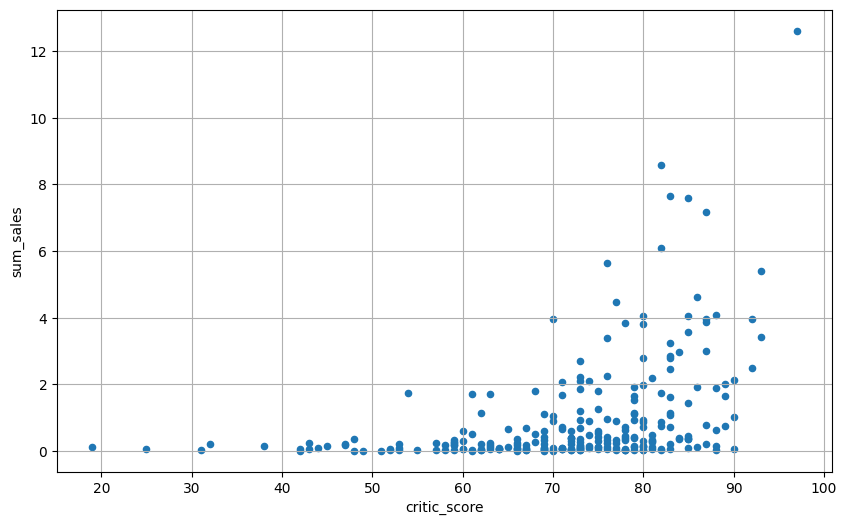

In [64]:
df_new_ps4.plot(x='critic_score', y='sum_sales', kind='scatter', grid=True, figsize=(10,6));

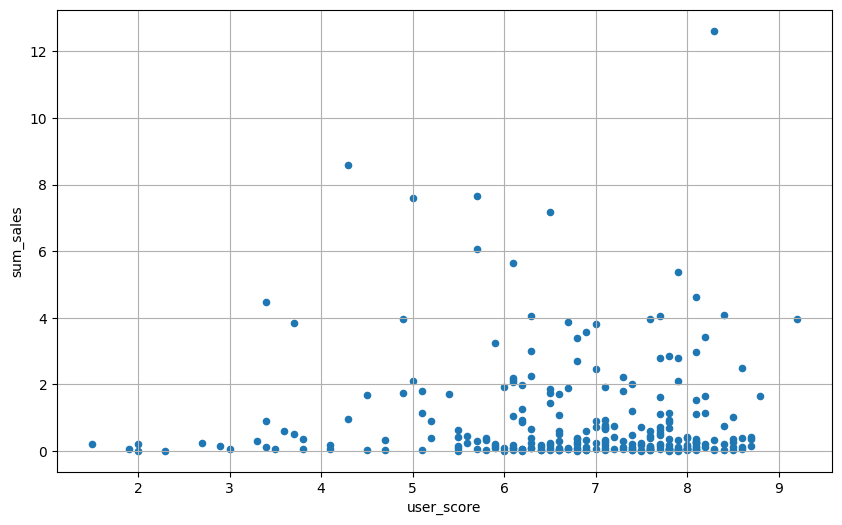

In [65]:
df_new_ps4.plot(x='user_score', y='sum_sales', kind='scatter', grid=True, figsize=(10,6));

In [66]:
df_new_ps4[['critic_score','user_score','sum_sales']].corr()

,critic_score,user_score,sum_sales
critic_score,1.000000,0.557654,0.406568
user_score,0.557654,1.000000,-0.031957
sum_sales,0.406568,-0.031957,1.000000


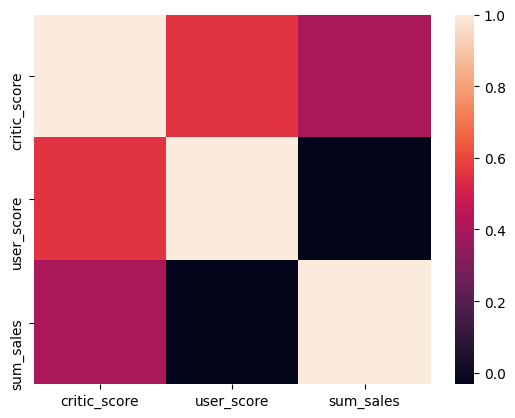

In [67]:
sns.heatmap(df_new_ps4[['critic_score', 'user_score', 'sum_sales']].corr());

<div style="border:solid orange 3px; padding: 20px">
    Отмечается некоторая связь между оценками критиков и объемами продаж для платформы ps4 - коэффициент корреляции составил 0,4. Продажи от 2 млн начинаются при оценке критиков больше 70 баллов, продажи больше 6 млн - при оценке от 80 баллов. Для оценок пользователей линейной связи с объемами продаж не наблюдается, коэффициент корреляции практически равен нулю, даже при низких пользовательских оценках отмечаются игры с большими объемами продаж. Например, при оценке около 4,3 из 10 объем продаж составил более 8 млн копий.

### Соотнесение выводов с продажами игр на других платформах


Платформа ps3


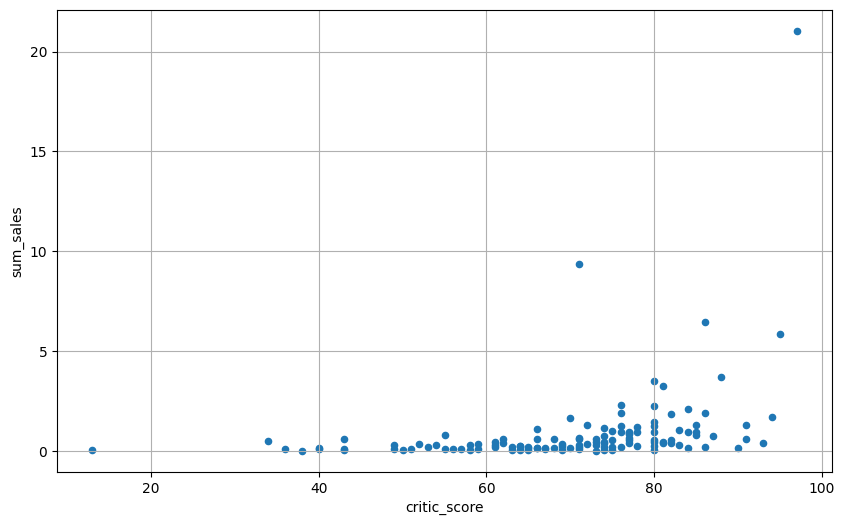

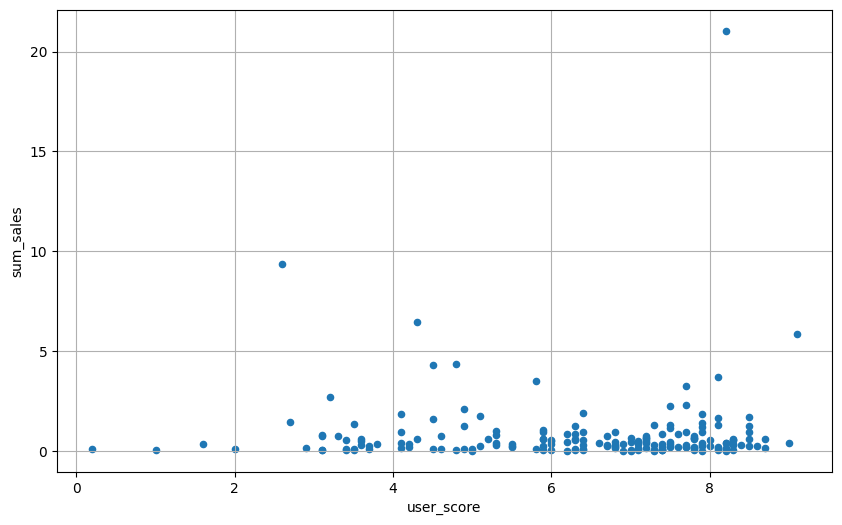

,critic_score,user_score,sum_sales
critic_score,1.000000,0.599920,0.334285
user_score,0.599920,1.000000,0.002394
sum_sales,0.334285,0.002394,1.000000


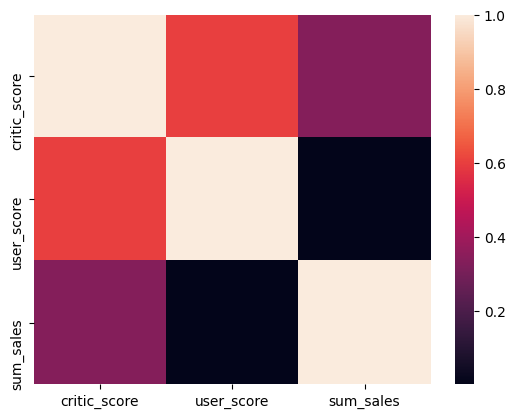


Платформа xone


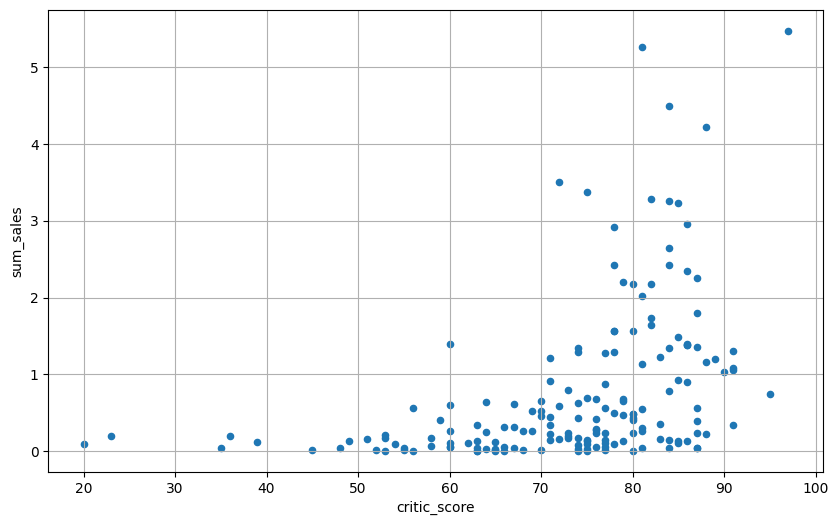

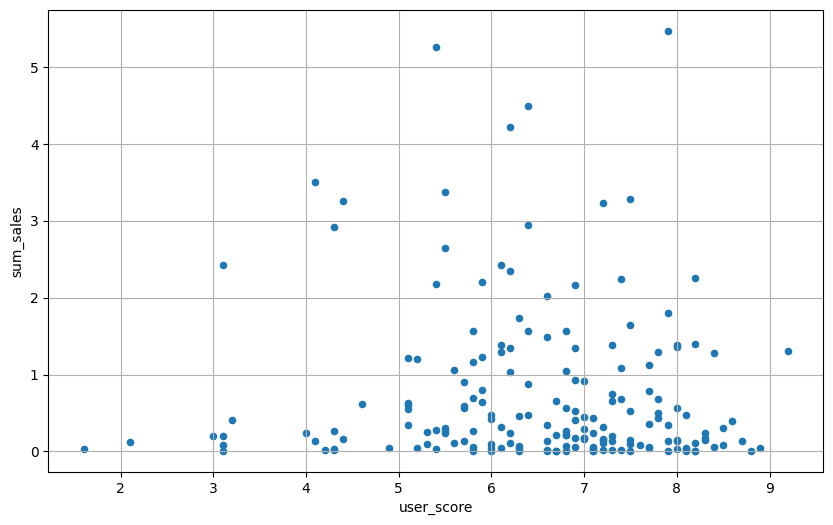

,critic_score,user_score,sum_sales
critic_score,1.000000,0.472462,0.416998
user_score,0.472462,1.000000,-0.068925
sum_sales,0.416998,-0.068925,1.000000


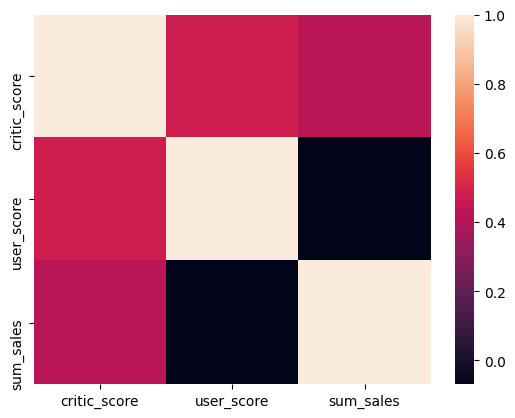


Платформа 3ds


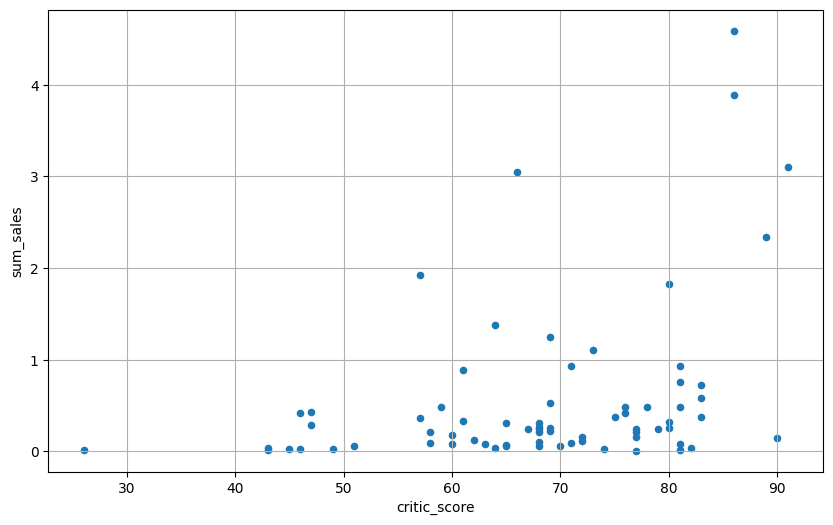

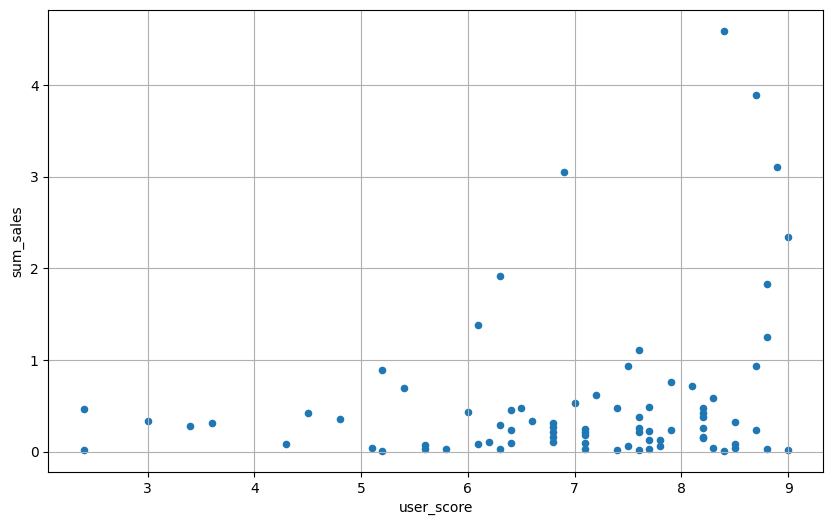

,critic_score,user_score,sum_sales
critic_score,1.000000,0.769536,0.357057
user_score,0.769536,1.000000,0.241504
sum_sales,0.357057,0.241504,1.000000


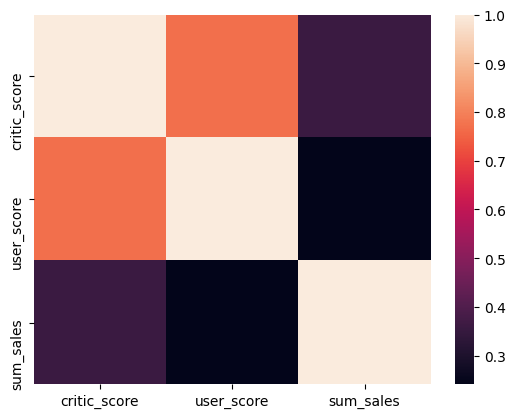


Платформа x360


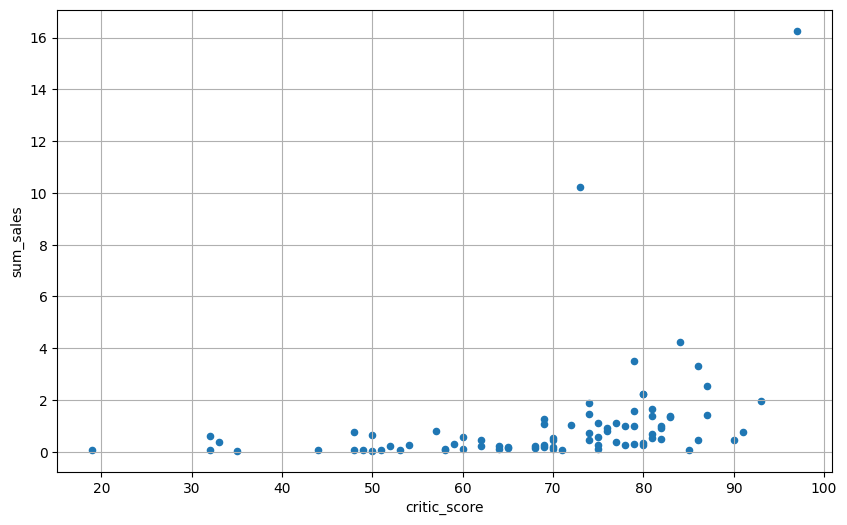

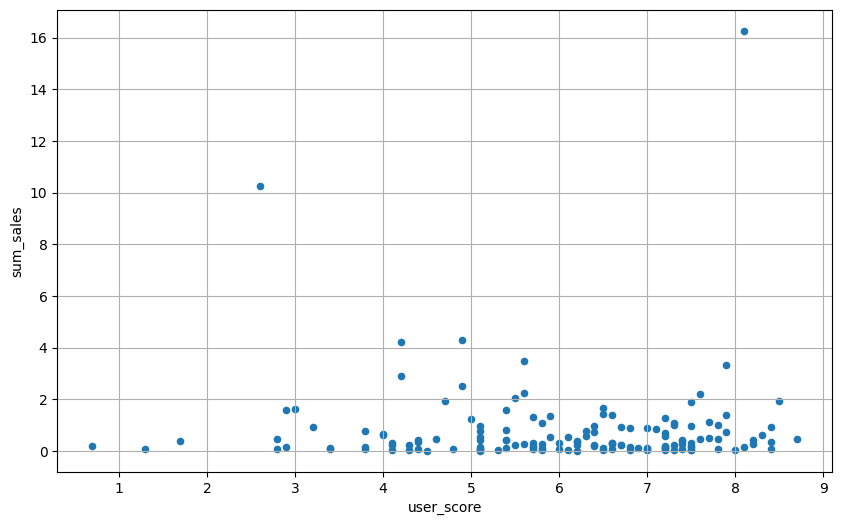

,critic_score,user_score,sum_sales
critic_score,1.000000,0.520946,0.350345
user_score,0.520946,1.000000,-0.011742
sum_sales,0.350345,-0.011742,1.000000


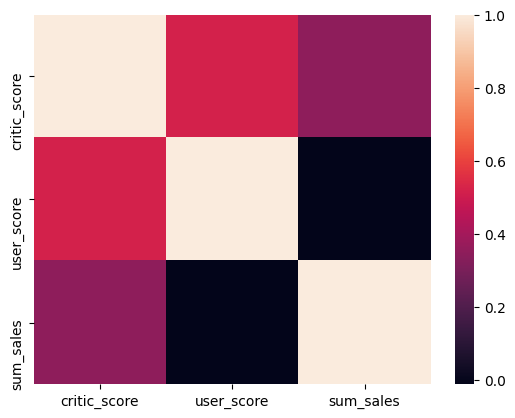

In [68]:
for n in ["ps3","xone", "3ds", "x360"]:
    df_new_pltf = df_new[df_new['platform'] == n]
    print()
    print(f"Платформа {n}")
    df_new_pltf.plot(x='critic_score', y='sum_sales', kind='scatter', grid=True, figsize=(10,6));
    plt.show()
    df_new_pltf.plot(x='user_score', y='sum_sales', kind='scatter', grid=True, figsize=(10,6));
    plt.show()
    display(df_new_pltf[['critic_score','user_score','sum_sales']].corr())
    sns.heatmap(df_new_pltf[['critic_score', 'user_score', 'sum_sales']].corr());
    plt.show()

<div style="border:solid orange 3px; padding: 20px"> Для платформ ps3, xone, x360 в целом наблюдается схожие закономерности, как и для ps4. Отмечается некоторая линейная связь объемов продаж с оценками критиков и практически отсутствует аналогичная связь с оценками пользователей. Немного отличается ситуация для 3ds, коэффициент корреляции между объемами продаж и оценкой пользователей составил 0,24, что означает слабую связь между показателями.

### Распределение игр по жанрам

In [69]:
df_new_pivot = df_new.pivot_table(index='genre', values='sum_sales', aggfunc=['count', 'sum'])
df_new_pivot.columns = ['count', 'sum']
df_new_pivot['mean_sum'] = df_new_pivot['sum'] / df_new_pivot['count']
df_new_pivot = df_new_pivot.reset_index().rename_axis(None, axis=1)
df_new_pivot.sort_values(by='mean_sum', ascending=False)

,genre,count,sum,mean_sum
8,shooter,187,232.98,1.245882
10,sports,214,150.65,0.703972
4,platform,74,42.63,0.576081
7,role-playing,292,145.89,0.499623
6,racing,85,39.89,0.469294
2,fighting,80,35.31,0.441375
0,action,766,321.87,0.420196
3,misc,155,62.82,0.405290
9,simulation,62,21.76,0.350968
5,puzzle,17,3.17,0.186471


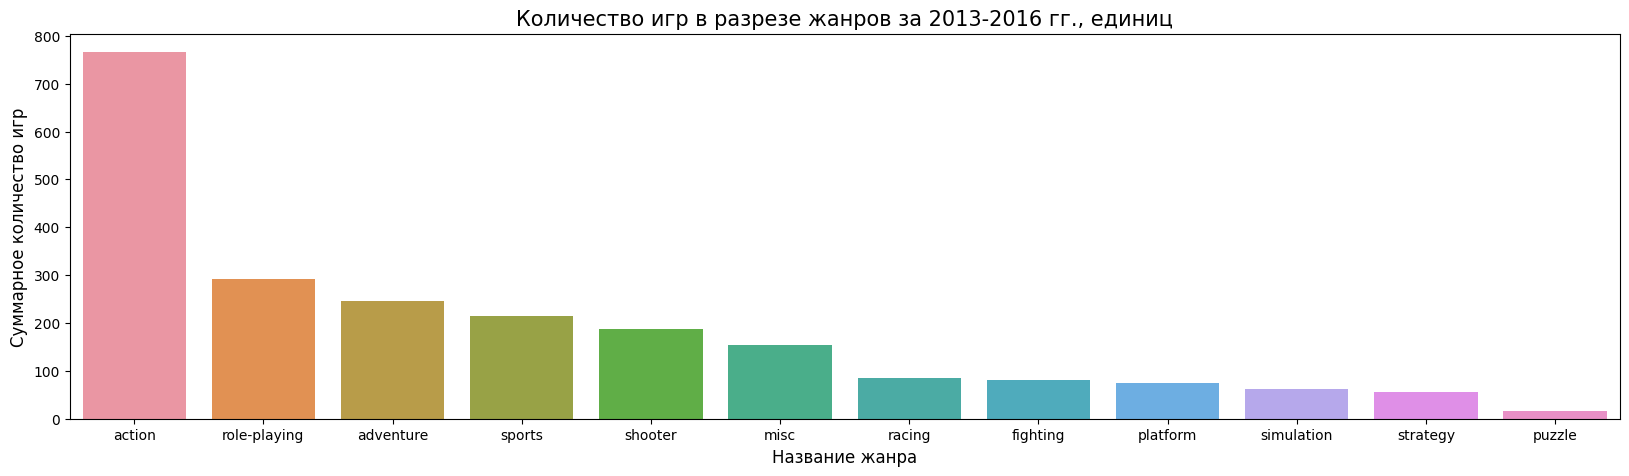

In [70]:
plt.figure(figsize=(20,5))
(
    sns.barplot(x='genre', 
                y='count', 
                data=df_new_pivot, 
                order=df_new_pivot.sort_values('count', ascending=False).genre)
)
plt.title("Количество игр в разрезе жанров за 2013-2016 гг., единиц", fontsize = 15)
plt.xlabel("Название жанра", fontsize = 12)
plt.ylabel("Суммарное количество игр", fontsize = 12);

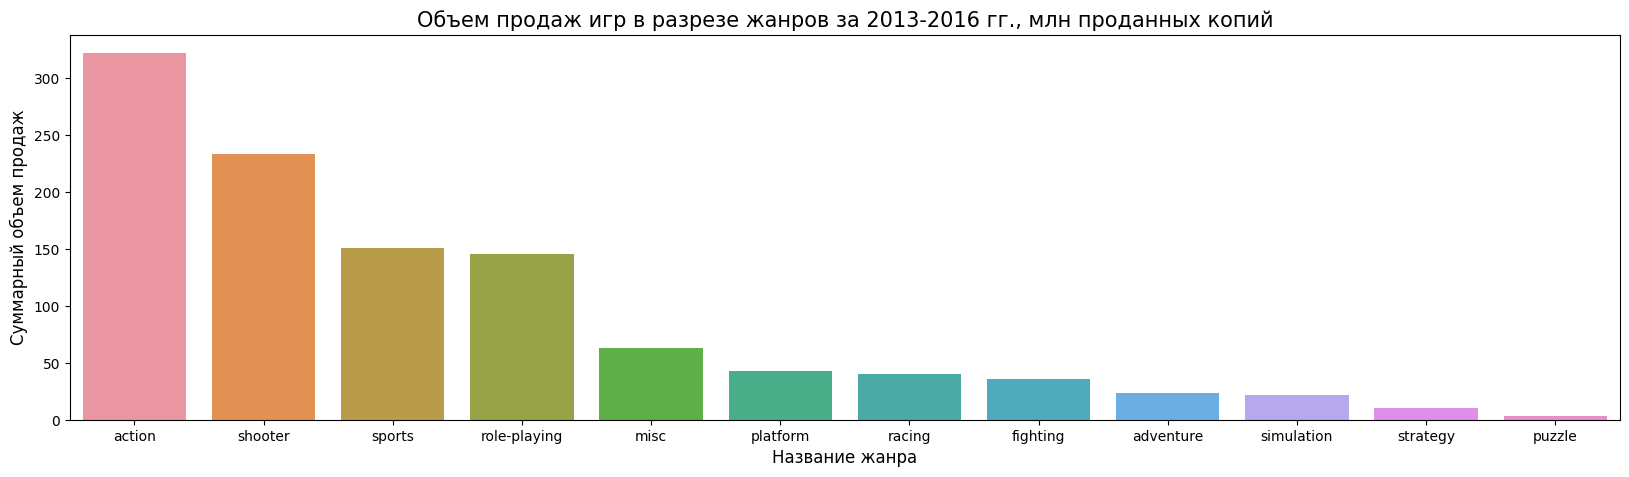

In [71]:
plt.figure(figsize=(20,5))
(
    sns.barplot(x='genre', 
                y='sum', 
                data=df_new_pivot, 
                order=df_new_pivot.sort_values('sum', ascending=False).genre)
)
plt.title("Объем продаж игр в разрезе жанров за 2013-2016 гг., млн проданных копий", fontsize = 15)
plt.xlabel("Название жанра", fontsize = 12)
plt.ylabel("Суммарный объем продаж", fontsize = 12);

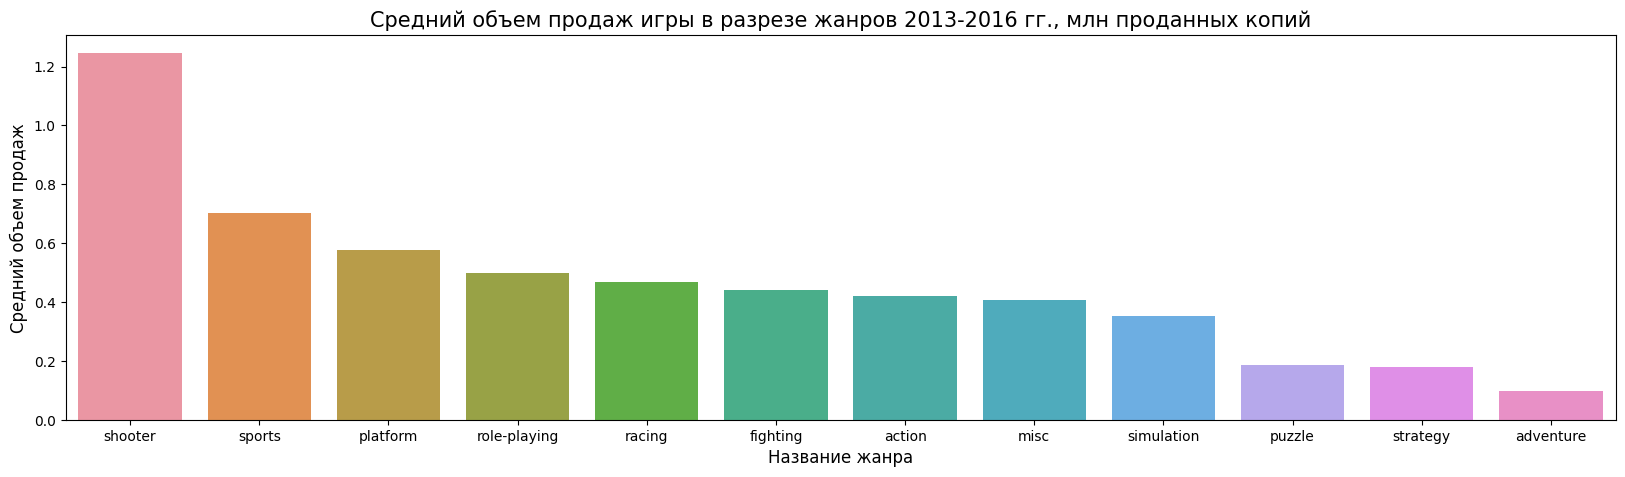

In [72]:
plt.figure(figsize=(20,5))
(
    sns.barplot(x='genre', 
                y='mean_sum', 
                data=df_new_pivot, 
                order=df_new_pivot.sort_values('mean_sum', ascending=False).genre)
)
plt.title("Средний объем продаж игры в разрезе жанров 2013-2016 гг., млн проданных копий", fontsize = 15)
plt.xlabel("Название жанра", fontsize = 12)
plt.ylabel("Средний объем продаж", fontsize = 12);

<div style="border:solid orange 3px; padding: 20px"> Как по количеству игр, так и по суммарным объемам их продаж лидирует жанр "action" - около 750 игр было продано тиражом более 300 млн копий. Но при этом в расчете на одну игру его существенно опережает жанр "shooter": в среднем одна игра продается тиражом более 1,2 млн копий, в то время как "action" - только 0,4 млн копий. Таким образом топ-3 самых прибыльных жанров: shooter, sports, platform, при этом шутеры существенно опережают остальные жанры. Наименее прибыльные жанры: puzzle, strategy, adventure. При этом в жанре adventure выпускалось достаточно много игр (3 место по суммарному количеству игр), но средний проданный тираж каждой игры составлял менее 0,1 млн копий.

## Портрет пользователя каждого региона

### Самые популярные платформы (топ-5)

In [73]:
for i in ['na_sales', 'eu_sales', 'jp_sales']:
    data = df_new.pivot_table(index='platform', values=i, aggfunc='sum').sort_values(by=i, ascending=False).head()
    data['part_reg'] = round(data[i] / df_new[i].sum() * 100, 2)
    display(data)
    print('Суммарный объем продаж в регионе:', round(df_new[i].sum(), 2))
    print('Доля топ-5 от общего объема продаж в регионе:', round(data['part_reg'].sum(),2))
    print()

,na_sales,part_reg
platform,,
ps4,108.74,24.84
xone,93.12,21.27
x360,81.66,18.66
ps3,63.50,14.51
3ds,38.20,8.73


Суммарный объем продаж в регионе: 437.71
Доля топ-5 от общего объема продаж в регионе: 88.01



,eu_sales,part_reg
platform,,
ps4,141.09,35.97
ps3,67.81,17.29
xone,51.59,13.15
x360,42.52,10.84
3ds,30.96,7.89


Суммарный объем продаж в регионе: 392.23
Доля топ-5 от общего объема продаж в регионе: 85.14



,jp_sales,part_reg
platform,,
3ds,67.81,48.17
ps3,23.35,16.59
psv,18.59,13.21
ps4,15.96,11.34
wiiu,10.88,7.73


Суммарный объем продаж в регионе: 140.78
Доля топ-5 от общего объема продаж в регионе: 97.04



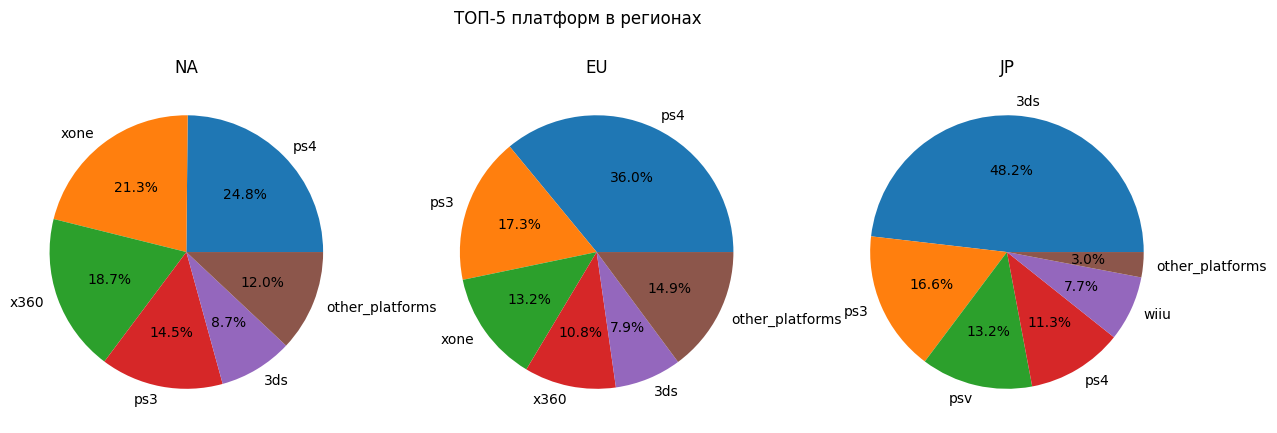

In [74]:
region = df_new.columns[4:7]
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('ТОП-5 платформ в регионах')
for i in range (3):
     df_i = (df_new.groupby('platform')[region[i]].sum().
     reset_index().
     sort_values(region[i], ascending = False, ignore_index = True).
     head(5))
     df_i = df_i.append(
         {'platform': 'other_platforms', region[i]: df_new[region[i]].sum() - df_i[region[i]].sum()}, 
         ignore_index= True)
     axs[i].pie(df_i[region[i]], labels = df_i['platform'], autopct='%1.1f%%')
     axs[i].set_title(df_i.columns[1].split('_')[0].upper())
plt.show()

<div style="border:solid orange 3px; padding: 20px"> Для Северной Америки и Европы топ-5 платформ совпадает, но распределение между ними различное: в Америке ps4 немного опережает xone, вместе они составляют почти половину от объема продаж игр в регионе, в Европе же только игры на ps4 составляют более трети от общего объема, на втором месте предыдущее поколение - ps3 с долей в 17%, xone занимает только третье место с долей в 13%. Можно заметить, что в Америке предпочитают новые поколения игровых платформ ps и xbox, а в Европе в целом отдают предпочтение платформам ps, нежели xbox. Платформа 3ds имеет схожую популярность в Америке и Европе (доля 8-9%). В Японии совсем другие предпочтения среди платформ - почти половина игр куплена на платформу 3ds - это портативная игровая приставка от японского производителя Nintendo, на втором месте платформа также от японского производителя Sony -  ps3 с долей в 16,6%, за ней следует еще одна портативная платформа psv - 13,2%, на пятом месте еще одна игровая платформа от Nintendo. Американские игровые платформы xbox в Японии популярностью не пользуются и входят в оставшиеся 3% других платформ. Таким образом можно отметить, что в Японии в значительной степени предпочитатют портативные игровые устройства от местных производителей.

### Самые популярные жанры (топ-5)

In [75]:
for i in ['na_sales', 'eu_sales', 'jp_sales']:
    data = df_new.pivot_table(index='genre', values=i, aggfunc='sum').sort_values(by=i, ascending=False).head()
    data['part_reg'] = round(data[i] / df_new[i].sum() * 100, 2)
    display(data)
    print('Суммарный объем продаж в регионе:', round(df_new[i].sum(), 2))
    print('Доля топ-5 от общего объема продаж в регионе:', round(data['part_reg'].sum(),2))
    print()

,na_sales,part_reg
genre,,
action,126.05,28.80
shooter,109.74,25.07
sports,65.27,14.91
role-playing,46.40,10.60
misc,27.49,6.28


Суммарный объем продаж в регионе: 437.71
Доля топ-5 от общего объема продаж в регионе: 85.66



,eu_sales,part_reg
genre,,
action,118.13,30.12
shooter,87.86,22.40
sports,60.52,15.43
role-playing,36.97,9.43
racing,20.19,5.15


Суммарный объем продаж в регионе: 392.23
Доля топ-5 от общего объема продаж в регионе: 82.53



,jp_sales,part_reg
genre,,
role-playing,51.04,36.26
action,40.49,28.76
misc,9.20,6.54
fighting,7.65,5.43
shooter,6.61,4.70


Суммарный объем продаж в регионе: 140.78
Доля топ-5 от общего объема продаж в регионе: 81.69



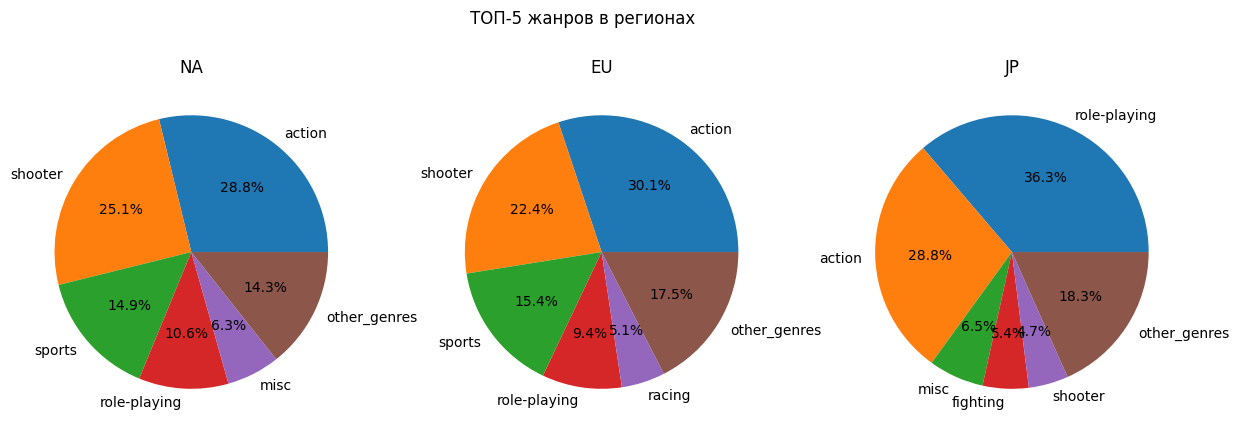

In [76]:
region = df_new.columns[4:7]
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('ТОП-5 жанров в регионах')
for i in range (3):
     df_i = (df_new.groupby('genre')[region[i]].sum().
     reset_index().
     sort_values(region[i], ascending = False, ignore_index = True).
     head(5))
     df_i = df_i.append(
         {'genre': 'other_genres', region[i]: df_new[region[i]].sum() - df_i[region[i]].sum()}, 
         ignore_index= True)
     axs[i].pie(df_i[region[i]], labels = df_i['genre'], autopct='%1.1f%%')
     axs[i].set_title(df_i.columns[1].split('_')[0].upper())
plt.show()

<div style="border:solid orange 3px; padding: 20px">
    Для Америки и Европы первые четыре жанра идентичны со схожими долями: около 30% занимает action, shooter - около 25%, sports - 15% и role-playing - 10%. На пятом месте в Америке жанр misc (miscellaneous - смешанный) - 6,3%, а в Европе - racing (5,1%). В Японии рейтинг жанров существенно отличается: на первом месте с долей в 36% жанр role-playing, на втором - action (28,8%), остальные жанры имеют долю менее 10%. С 3 по 5 место с долей 5-6% занимают жанры misc, fighting, shooter.

### Влияние рейтинга ESRB на продажи в отдельном регионе

In [77]:
for i in ['na_sales', 'eu_sales', 'jp_sales']:
    data = df_new.pivot_table(index='rating', values=i, aggfunc='sum').sort_values(by=i, ascending=False)
    data['part_reg'] = round(data[i] / df_new[i].sum() * 100, 2)
    display(data)
    print()

,na_sales,part_reg
rating,,
m,165.21,37.74
unknown,89.42,20.43
e,79.05,18.06
e10+,54.24,12.39
t,49.79,11.38


,eu_sales,part_reg
rating,,
m,145.32,37.05
e,83.36,21.25
unknown,78.91,20.12
e10+,42.69,10.88
t,41.95,10.70


,jp_sales,part_reg
rating,,
unknown,85.05,60.41
t,20.59,14.63
e,15.14,10.75
m,14.11,10.02
e10+,5.89,4.18


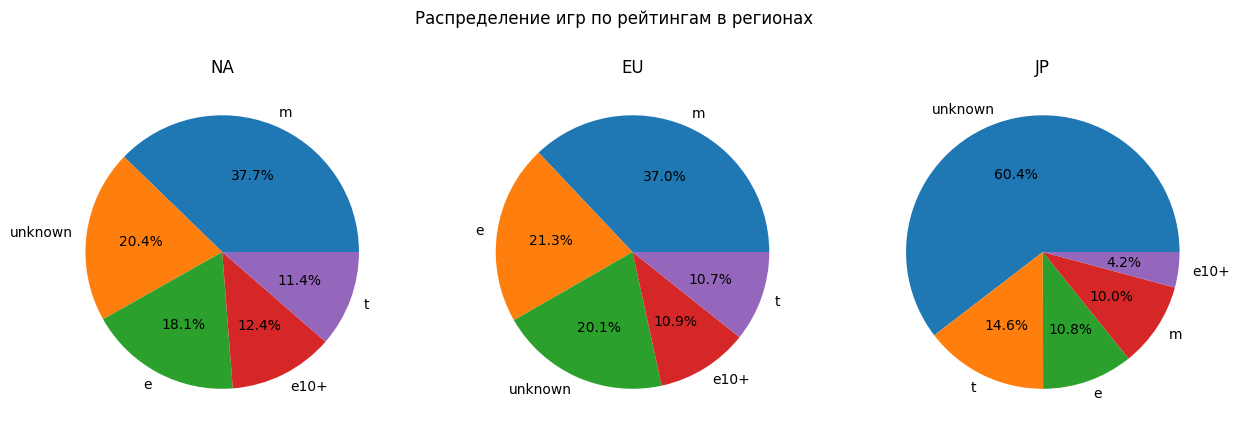

In [78]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('Распределение игр по рейтингам в регионах')
for i in range(3):
 
  df_i = (df_new.groupby('rating')[region[i]].sum().
             reset_index().
             sort_values(region[i], ascending = False, ignore_index = True).
             head(5))
  
  axs[i].pie(df_i[region[i]], labels = df_i['rating'], autopct='%1.1f%%')
  
  axs[i].set_title(df_i.columns[1].split('_')[0].upper())
plt.show()

<div style="border:solid orange 3px; padding: 20px">
Для Америки и Европы в целом схожее распределение по рейтинагм: на первом месте игры для взрослых с долей 37% (m), далее идут игры для всех (e), от 10 лет (e10+) и для подростков (t). Около 20% игр не имеют рейтинга. В Японии на первом месте игры без рейтинга - их доля 60%, на втором месте игры для подростков - 14,6%. Возможно, в Японии преобладают местные игры, рейтинг для которых устанавливается местной организацией, который не был учтен в датасете. Нельзя однозначно определить, влияет ли рейтинг на продажи, т.к. имеем множество игр без установленного рейтинга. Кроме того, рейтинг игры часто очень зависит от ее жанра: если это шутер, то скорее всего там могут присутствовать сцены насилия, значит у этой игры будет рейтинг для взрослых. Тогда распределение по рейтингу перекликается с распределением по жанрам, описанным выше.

## Проверка гипотез

Т.к. нам необходимо проверить равенство средних значений двух независимых генеральных совокупностей на основе их выборок, для расчетов будем использовать t-test критерий Стьюдента

### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Наши гипотезы:
- H0: средние рейтинги одинаковые
- H1: средние рейтинги отличаются

In [79]:
df_xbox = df_new.loc[(df_new['platform'] == 'xone') & ~df_new['user_score'].isna()]
df_xbox.shape

(182, 12)

In [80]:
df_pc = df_new.loc[(df_new['platform'] == 'pc') & ~df_new['user_score'].isna()]
df_pc.shape              

(155, 12)

Применяем критерий для проверки двух независимых выборок, т.к. рассматриваем пользовательские рейтинги разных платформ в один временной промежуток. Выборки разного размера, поэтому применяем equal_var = False 

In [81]:
alpha = .05
results = st.ttest_ind(df_xbox['user_score'], df_pc['user_score'], equal_var=False)
print('p-значение:', results.pvalue)

p-значение: 0.14759594013430463


In [82]:
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

Не получилось отвергнуть нулевую гипотезу


<div style="border:solid orange 3px; padding: 20px">  Т.к. нулевую гипотезу о равенстве средних рейтингов не получилось отвергнуть, у нас нет оснований полагать, что средние пользовательские рейтинги платформ Xbox One и PC значимо отличаются.

### Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные

Наши гипотезы:
- H0: средние рейтинги одинаковые
- H1: средние рейтинги отличаются

In [83]:
df_action = df_new.loc[(df_new['genre'] == 'action') & (~df_new['user_score'].isna())]
df_action.shape

(389, 12)

In [84]:
df_sports = df_new.loc[(df_new['genre'] == 'sports') & (~df_new['user_score'].isna())]
df_sports.shape              

(160, 12)

Применяем критерий для проверки двух независимых выборок, т.к. рассматриваем пользовательские рейтинги разных жанров в один временной промежуток. Выборки разного размера, поэтому применяем equal_var = False 

In [85]:
alpha = .05
results = st.ttest_ind(df_action['user_score'], df_sports['user_score'], equal_var=False)
print('p-значение:', results.pvalue)

p-значение: 1.4460039700704315e-20


In [86]:
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

Отвергаем нулевую гипотезу


<div style="border:solid orange 3px; padding: 20px">Т.к. нулевую гипотезу о равенстве средних рейтингов мы отвергаем, у нас есть основания полагать, что средние пользовательские рейтинги жанров action и sports отличаются.

## Общий вывод

   - В нашем распоряжении оказался датасет из 16715 наблюдений с данными о продажах игр с 1980 по 2016 годы, оценках пользователей и экспертов, жанрах и игровых платформах. Нашей целью было выявить закономерности, определяющие успешность игр, что позволит выявить потенциально популярные продукты и спланировать будущие рекламные кампании.
   
   - В первую очередь была проведена предобработка данных: названия всех столбцов приведены к нижнему регистру, все необходимые столбцы - к правильному типу данных, обработаны пропуски.
   
   - Далее в ходе непосредственного анализа данных определили, что до 1994 года выпускалось менее 100 игр в год, пик по количеству продаж пришелся на 2008 год - 1441 игра, с 2006 по 2011 год выпускалось более 1000 игр ежегодно, с 2012 года количество игр сократилось почти на 500 единиц.
   - Жизненный цикл игровой платформы составляет около 10 лет, следующие поколения популярных платформ выходят примерно через 6 лет после старта предыдущего поколения.
   - Актуальным периодом для анализа выбрали 2013-2016 годы, т.к в 2013 году появились ps4 и xone, которые являлись лидерами рынка в 2014-2016 годы и в большей степени определяли его динамику.
   - Топ-5 платформ по продажам за 2013-2016 гг.: ps4, ps3, xone, 3ds, x360. При этом продажи ps3, 3ds и x360 идут на спад и сами платформы находятся в конечной стадии своего существования, в то время как ps4 и xone судя по динамике других платформ еще скорее всего не прошли свой пик продаж и на данный момент являются потенциально самыми прибыльными платформами.
   - В результате анализа грфиков "ящик с усами" определили, что для большинства платформ характерно некоторое количество выбросов, которые представляют игры с самыми большими объемами продаж, так называемые бестселлеры. Одной из таких является GTA 5, суммарные продажи которой на ps3 составили 21 млн копий, на x360 - 16 млн копий. Половина всех игр на большинстве платформ продается объемами продаж до 0,25 млн копий, 75% игр - до 1 млн копий. 
   - В результате корреляционного анализа отмечена умеренная связь между оценками критиков и объемами продаж для популярных игровых платформ. Между оценками пользователей и объемами продаж корреляция практически нулевая за исключением платформы 3ds, для которой коэффициент корреляции между данными показателями составил 0,24.
   - Топ-3 самых прибыльных жанров: shooter, sports, platform, при этом шутеры существенно опережают остальные жанры. Наименее прибыльные жанры: puzzle, strategy, adventure.
   - В Северной Америке предпочитают играть в игры для взрослых жанра экшн и шутеры на игровых приставках PlayStation и Xbox последних поколений.
   - В Европе предпочитают играть в игры для взрослых жанра экшн и шутеры на игровых приставках PlayStation разных поколений.
   - В Японии предпочитают играть в ролевые игры неизвестного нам рейтинга на портативной игровой приставке Nintendo 3ds.
   - В результате проверки гипотез определили, что у нас нет оснований полагать, что средние пользовательские рейтинги платформ Xbox One и PC значимо отличаются, но есть основания полагать, что отличаются средние пользовательские рейтинги жанров action и sports.
    